## <span style='color: crimson'> **Please Note That The Dataset Used Does Not Contain The Total Amount Of Those In The Titanic. This is because most of the data were lost in the ship.** </span>

## <span style='color: #8b0000'> **1. Importing the libraries necessary for the operation** 

In [60]:
import numpy as np 
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

# to silent the warnings
import sys 
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
#to display numbers to two decimal place
pd.options.display.float_format = '{:,.2f}'.format

#our magic key so that the plot dosen't appear as a pop-up or something.....can't really explain
%matplotlib inline

## <span style='color: #8b0000'>   **2. loading the dataframe to the note book**
#### Loading.....

In [2]:
titanic_df = pd.read_csv("C:\\Users\\USER\\data_science/CSV's/train.csv")
titanic_df.Embarked.fillna('C',inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [25]:
# Here are the keys for the table above.
Data_Dictionary = pd.DataFrame({'Variable' : ['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], 
                               'Definition' : ['Survival', 'Ticket', 'Sex', 'Age in years', '  | Number of siblings / spouses aboard the Titanic', '  | Number of children / parent aboard the Titanic', 'Ticket number', 'Passengers fare', 'Cabin number', 'Port of Embarkation'], 
                               'Key' : ['0 = No, 1 = Yes', '1 = 1st, 2 = 2nd, 3 = 3rd',"","","","","","","", '   |  C = Cherbourg, Q = Queenstown, S = Southampton']})
Data_Dictionary

,Variable,Definition,Key
0,Survived,Survival,"0 = No, 1 = Yes"
1,Pclass,Ticket,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,Sex,Sex,
3,Age,Age in years,
4,Sibsp,| Number of siblings / spouses aboard the Ti...,
5,Parch,| Number of children / parent aboard the Tit...,
6,Ticket,Ticket number,
7,Fare,Passengers fare,
8,Cabin,Cabin number,
9,Embarked,Port of Embarkation,"| C = Cherbourg, Q = Queenstown, S = South..."


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


## <span style='color: #8b0000'>   **3. Now let the fun begin. I meant to say let's start our cleaning and some exploratory questions.**

<hr/>

**Questions like,**
- Does age matter for survival?
- Does gender matter for survival?
- How about class? Does it matter for survival?
- You know the ladies love vacations. So where they the most on board? And did they ride first class?
- From what location did people board the most and what location had the most survivors?

In [6]:
# Let's find out how the null values are spreaded across
titanic_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### **Lets fill the missing age values with the mean for the ages**

In [7]:
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)
titanic_df.Age

0     22.00
1     38.00
2     26.00
3     35.00
4     35.00
       ... 
886   27.00
887   19.00
888   29.70
889   26.00
890   32.00
Name: Age, Length: 891, dtype: float64

In [8]:
titanic_df.Age.isna().sum()

0

##### **FILLED** 
<hr/>

## <span style='color: #8b0000'>  **Analyzing the data for more information**

0   61.62
1   38.38
Name: Survived, dtype: float64


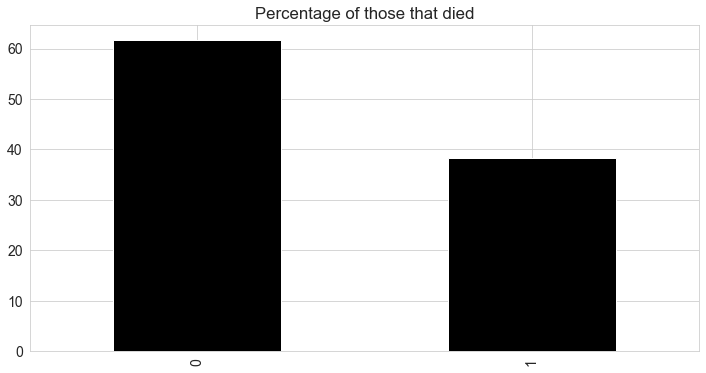

In [9]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

survival_rate = titanic_df['Survived'].value_counts() * 100 / len(titanic_df)
plt.title('Percentage of those that died')
survival_rate.plot(kind='bar', 
                   color='black')

print(titanic_df['Survived'].value_counts() * 100 / len(titanic_df))

##### **That's really sad, only about 38% survived**

male      577
female    314
Name: Sex, dtype: int64


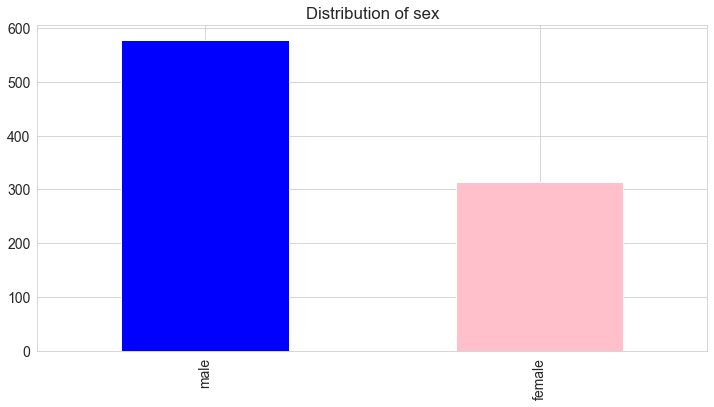

In [10]:
print(titanic_df.Sex.value_counts())

matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))

plt.title('Distribution of sex')
titanic_df.Sex.value_counts().plot(kind='bar',
                                   color=['blue','pink']);

##### **Gender distribution shows more males almost 2x the females**

1    216
2    184
3    491
Name: Pclass, dtype: int64


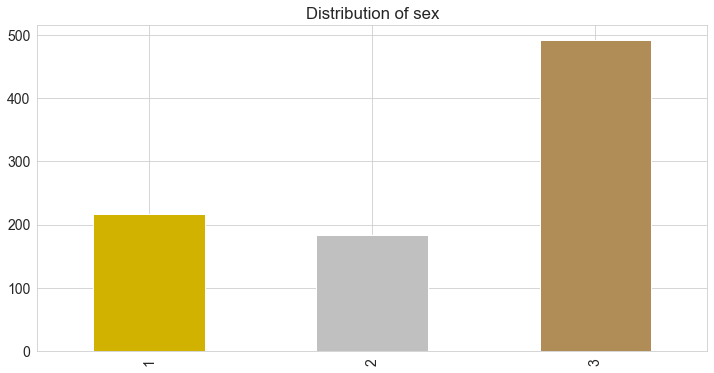

In [58]:
print(titanic_df.Pclass.value_counts().sort_index())

plt.figure(figsize=(12, 6))

plt.title('Distribution of sex')
titanic_df.Pclass.value_counts().sort_index().plot(kind='bar', 
                                                   color=['#d1b200', 'silver', '#b08d57']);
#The 'sort_index()' method was added so as to display the values accordingly

##### **Distribution based on Class** 
<hr/>

#### <span style='color: orange'>  **Question 1: Does age matter for survival?**

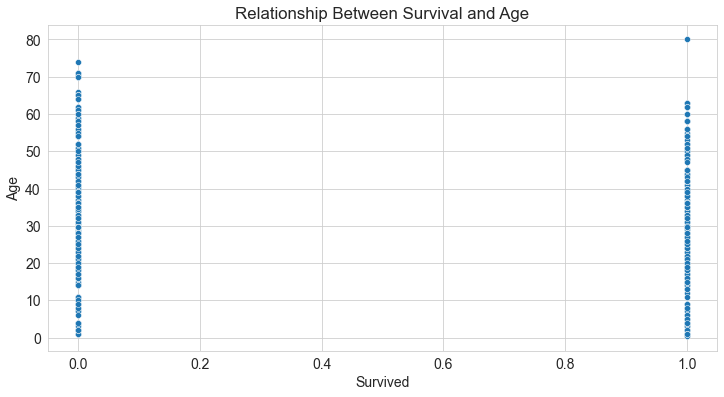

In [12]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))

plt.title('Relationship Between Survival and Age')
sns.scatterplot(titanic_df.Survived, titanic_df.Age);

##### **It seems like the relationship between them actually is not easy to understand. How about we try to see the age group(in ten's) that survived the most**

In [13]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
titanic_df['Age group'] = pd.cut(titanic_df.Age, bins)

(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Age group, dtype: int64


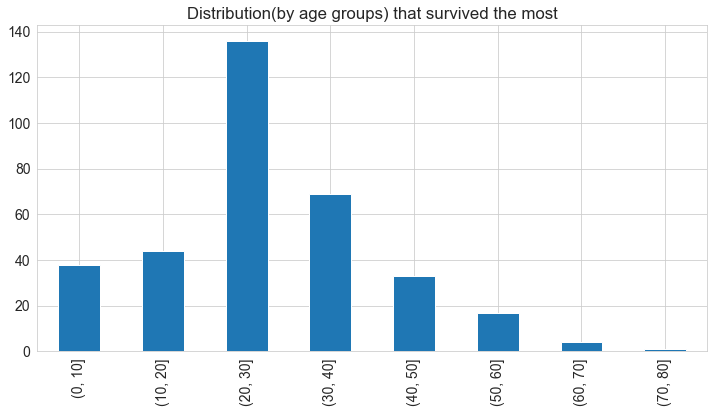

In [14]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))

titanic_df[titanic_df.Survived == 1]['Age group'].value_counts().sort_index().plot(kind='bar');
plt.title('Distribution(by age groups) that survived the most')

print(titanic_df[titanic_df.Survived == 1]['Age group'].value_counts().sort_index())

##### **The age gap [20, 30] shows the highest survival rate. Let's the trend for death.**

(0, 10]      26
(10, 20]     71
(20, 30]    271
(30, 40]     86
(40, 50]     53
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: Age group, dtype: int64


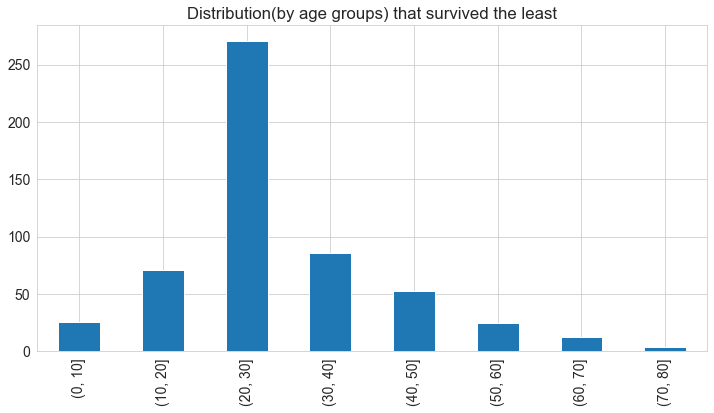

In [15]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))

titanic_df[titanic_df.Survived == 0]['Age group'].value_counts().sort_index().plot(kind='bar');
plt.title('Distribution(by age groups) that survived the least')

print(titanic_df[titanic_df.Survived == 0]['Age group'].value_counts().sort_index())

##### **Hmmmm, the age range also shows the higest number of death. I'm thinking cause they were the most on the ship.** 

In [16]:
len(titanic_df[(titanic_df['Age'] > 20) & (titanic_df['Age'] <= 30)])

407

##### They were 407 people between the range of 20-30 out of all 891 people with 136 surviving and 271 not.

##### **In conclusion, we can see that age group was not a criteria for survival as all age group faced simmilar fate. The [20, 30] group, might seem favourabel for survival but they actually had the heigest number of loss, which is more than their survivors.**
<hr/>

#### <span style='color: orange'> **Question 2: Does gender matter for survival?**

female    233
male      109
Name: Sex, dtype: int64


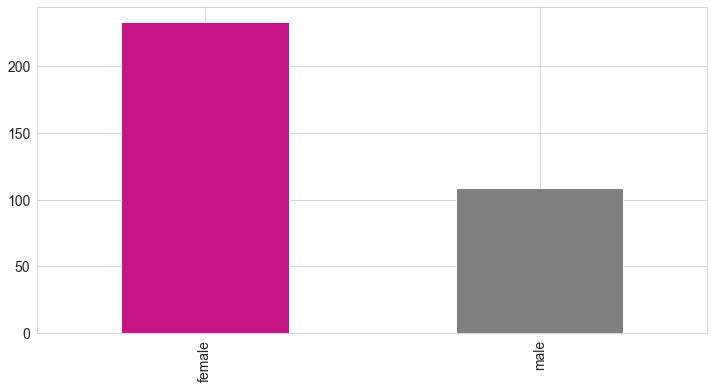

In [17]:
plt.figure(figsize=(12, 6))

titanic_df[titanic_df.Survived == 1].Sex.value_counts().plot(kind='bar', 
                                                            color=['mediumvioletred', 
                                                                   'gray']);
print(titanic_df[titanic_df.Survived == 1].Sex.value_counts())

##### **Woah! The females survived way more than the males. Well, if you have seen the movie you might understand why.**

female   68.13
male     31.87
Name: Sex, dtype: float64


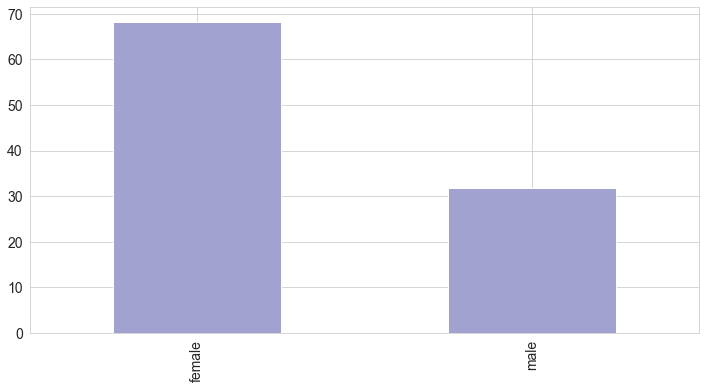

In [59]:
plt.figure(figsize=(12, 6))

percet_by_sex = titanic_df[titanic_df.Survived == 1].Sex.value_counts() * 100 / len(titanic_df[titanic_df.Survived == 1].Sex)
percet_by_sex.plot(kind='bar', color='#a2a2d0')

print(titanic_df[titanic_df.Survived == 1].Sex.value_counts() * 100 / len(titanic_df[titanic_df.Survived == 1].Sex))

##### **With the following analysis, we can see that almost 70% of the suvivors were females. This shows that, gender actuall mattered for survival in the titanic**
<hr/>

#### <span style='color: orange'> **Question 3 : How about class? Does it matter for survival?**

1    136
2     87
3    119
Name: Pclass, dtype: int64


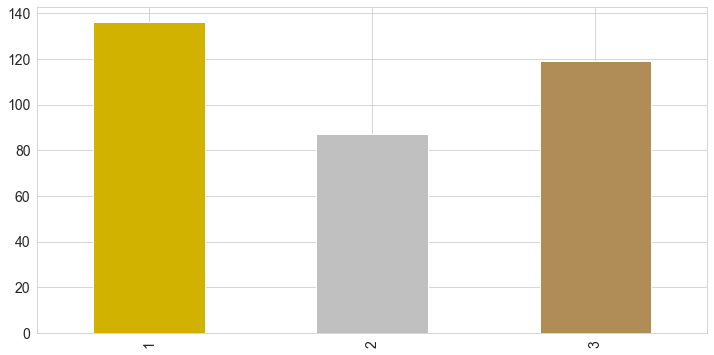

In [57]:
plt.figure(figsize=(12, 6))

titanic_df[titanic_df.Survived == 1].Pclass.value_counts().sort_index().plot(kind='bar', 
                                                   color=['#d1b200', 'silver', '#b08d57']);

print(titanic_df[titanic_df.Survived == 1].Pclass.value_counts().sort_index())

Out of all the suvivors 39.77% came from the 1st class passengers while 25.44% came form those in 2nd class and 34.80% where from the 3rd class


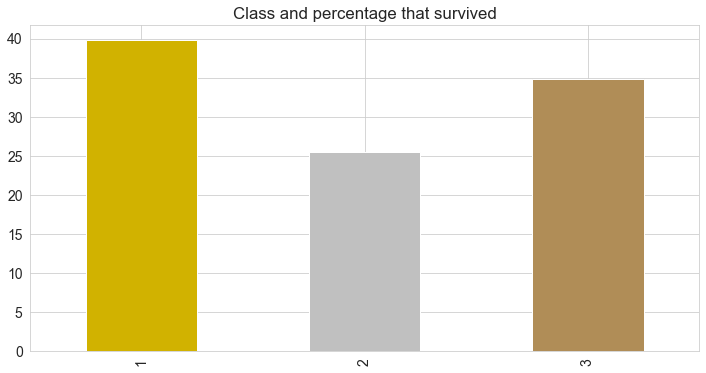

In [66]:
print('Out of all the suvivors 39.77% came from the 1st class passengers while 25.44% came form those in 2nd class and 34.80% where from the 3rd class')

plt.figure(figsize=(12, 6))
plt.title('Class and percentage that survived')

percet_by_class = titanic_df[titanic_df.Survived == 1].Pclass.value_counts().sort_index() * 100 / len(titanic_df[titanic_df.Survived == 1].Pclass)
percet_by_class.plot(kind='bar',
                     color=['#d1b200', 'silver', '#b08d57']);

In [73]:
print('In futher calculations we can see that {:,.0f}% of those in 1st class survived, {:,.0f}% of those in 2nd class and {:,.0f}% of those in 3rd class survived' .format(len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 1)]) * 100 / len(titanic_df[titanic_df.Pclass == 1 ]),
                                                                                       len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 2)]) * 100 / len(titanic_df[titanic_df.Pclass == 2 ]),
                                                                                       len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 3)]) * 100 / len(titanic_df[titanic_df.Pclass == 3 ])))

In futher calculations we can see that 63% of those in 1st class survived, 47% of those in 2nd class and 24% of those in 3rd class survived


##### **And so, money did save those in 1st class as they by far had the most survivors**
<hr/>

#### <span style='color: orange'> **Question 4 : You know the ladies love vacations. So where they the most on board? And did they ride first class?**

male      577
female    314
Name: Sex, dtype: int64

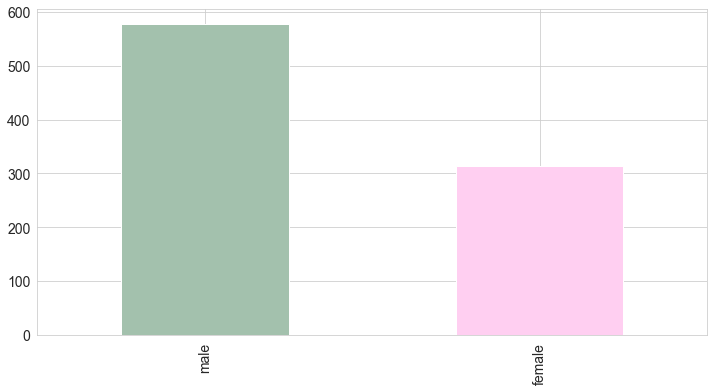

In [49]:
plt.figure(figsize=(12, 6))

titanic_df.Sex.value_counts().plot(kind='bar',
                                  color=['#a3c1ad', '#ffcff1']);
titanic_df.Sex.value_counts()

##### **Okay, we can see that they were more males than females. As we have seen before, approximately 32% of the passengers were females.** 
##### **And now, to see if most were 1st class passengers**

In [23]:
len(titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Pclass == 1)])

94

In [24]:
print('1st class had {} passengers of which {} were females '.format(len(titanic_df[titanic_df.Pclass == 1]),
                                                                     len(titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Pclass == 1)])))

1st class had 216 passengers of which 94 were females 


##### **With these analysis we can see that; 1) Females were not the most in 1st class and <br>  2) They were the most in 1st class**
<hr/>

#### <span style='color: orange'>  **Final Questions: From what location did people board the most and what location had the most survivors?**

In [31]:
 pd.DataFrame({'Variable' : ['Embarked'], 
               'Definition' : [ 'Port of Embarkation'], 
               'Key' : [' C = Cherbourg, Q = Queenstown, S = Southampton']})

,Variable,Definition,Key
0,Embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


Amount of those that boarded from various locations were
 C    170
Q     77
S    644
Name: Embarked, dtype: int64


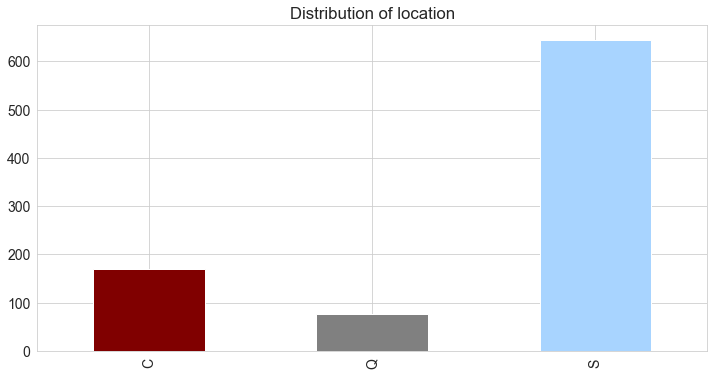

In [96]:
print('Amount of those that boarded from various locations were\n',titanic_df.Embarked.value_counts().sort_index())

plt.figure(figsize=(12, 6))
matplotlib.rcParams['font.size'] = 14

plt.title('Distribution of location')
titanic_df.Embarked.value_counts().sort_index().plot(kind='bar', 
                                                   color=['maroon', 'gray', '#a8d4ff']);

C   27.78
Q    8.77
S   63.45
Name: Embarked, dtype: float64


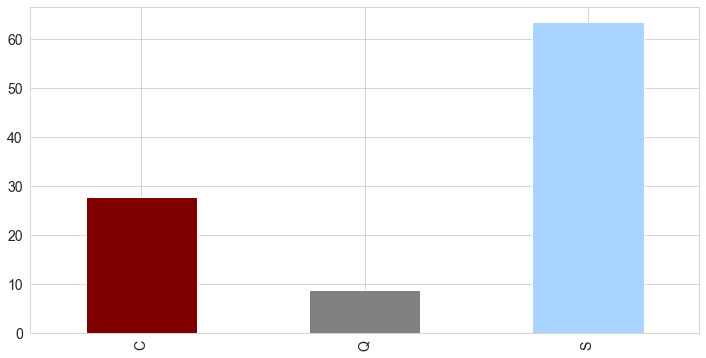

In [106]:
plt.figure(figsize=(12, 6))
matplotlib.rcParams['font.size'] = 14

print(percet_by_location)
percet_by_location = titanic_df[titanic_df.Survived == 1].Embarked.value_counts().sort_index() * 100 / len(titanic_df[titanic_df.Survived == 1].Embarked)
percet_by_location.plot(kind='bar', 
                        color=['maroon', 'gray', '#a8d4ff']);

In [101]:
print('Cherbourg = {:,.0f}%, Queenstown = {:,.0f}%, Southampton = {:,.0f}%'.format(len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Embarked == 'C')]) * 100 / len(titanic_df[titanic_df.Embarked == 'C' ]),
      len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Embarked == 'Q')]) * 100 / len(titanic_df[titanic_df.Embarked == 'Q']),
      len(titanic_df[(titanic_df.Survived == 1) & (titanic_df.Embarked == 'S')]) * 100 / len(titanic_df[titanic_df.Embarked == 'S'])))

Cherbourg = 56%, Queenstown = 39%, Southampton = 34%


##### **In conclusion, they were 170 persons who boarded the Titanic from Cherbourg, 77 from Queenstown and 644 from Southampton. Although, it looks like the place that had the most survivors was Southampton because it had 63% of the survivors. Cherbourg had more survivors as about 56% of those that boarded from Cherbourg survived. While, 39% of those that boarded from Queenstown and 34% of those that boarded from Southampton survived** 